# Explore here

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()


# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

artist_id = "61C3cEhdoJ9YiQSQSwYB4K"
#artist_id = "5MmVJVhhYKQ86izuGHzJYA"  # Mika


In [8]:
#Top tracks de un artista por ID
results = spotify.artist_top_tracks(artist_id)

songs = []
for element in results['tracks']:
    minutos = element['duration_ms'] // 60000
    segundos = (element['duration_ms'] % 60000) // 1000
    if segundos < 10:
        segundos = f"0{segundos}"
    else:
        segundos = str(segundos)
    songs.append({
        'titulo': element['name'],
        'popularidad': element['popularity'],
        'duracion': f"{minutos}:{segundos}"
    })
print(songs)


[{'titulo': 'Viento de Cara', 'popularidad': 58, 'duracion': '4:17'}, {'titulo': 'Supersubmarina', 'popularidad': 56, 'duracion': '4:06'}, {'titulo': 'LN Granada', 'popularidad': 56, 'duracion': '3:11'}, {'titulo': 'De las Dudas Infinitas', 'popularidad': 54, 'duracion': '4:46'}, {'titulo': 'Algo Que Sirva Como Luz', 'popularidad': 53, 'duracion': '3:57'}, {'titulo': 'Puta Vida', 'popularidad': 52, 'duracion': '2:50'}, {'titulo': 'Chas! Y Aparezco A Tu Lado', 'popularidad': 50, 'duracion': '2:49'}, {'titulo': 'En Mis Venas', 'popularidad': 50, 'duracion': '3:50'}, {'titulo': 'Arena y Sal', 'popularidad': 49, 'duracion': '4:28'}, {'titulo': 'Tecnicolor', 'popularidad': 48, 'duracion': '3:21'}]


In [9]:
# Crear un DataFrame de las canciones y ordenar por popularidad
songs_df = pd.DataFrame(songs)
songs_df = songs_df.sort_values(by='popularidad', ascending=False)
print(songs_df.head(3))

           titulo  popularidad duracion
0  Viento de Cara           58     4:17
1  Supersubmarina           56     4:06
2      LN Granada           56     3:11


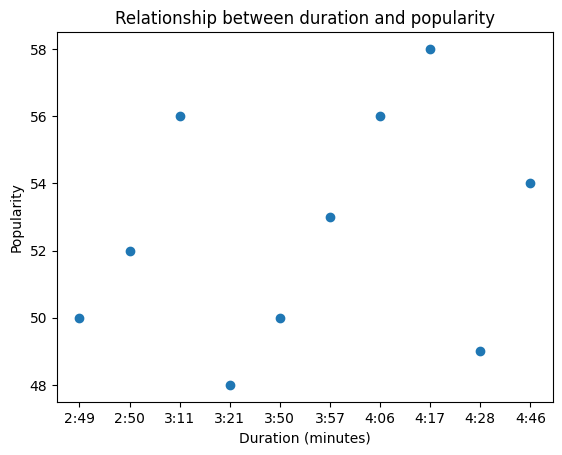

In [10]:
# Relación la duración con la popularidad

def duracion_a_segundos(duracion):
    minutos, segundos = map(int, duracion.split(':'))
    return minutos * 60 + segundos

songs_df['duracion_segundos'] = songs_df['duracion'].apply(duracion_a_segundos) #Aplicar a la columna duracion el metodo de segundos

songs_df = songs_df.sort_values(by='duracion_segundos')

plt.scatter(songs_df['duracion'], songs_df['popularidad'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Relationship between duration and popularity')
plt.show()

Parece ser que no hay una relacion directa entre el tiempo de duración de la canción con la popularidad que tiene, son totalmente independientes, aunque la canción que dura mas es una de 4 minutos, le siguen dos canciones de 4 y 3 minutos, a partir de ahi se siguen mostrando tiempos variables siendo la menos popular una de 3 minutos con 21. En conclusión, no tienen correlación el tiempo de duración con la popularidad.

Para el resto de ejercicios se ve que me da problemas de autorización debido a la cuenta o a la app, por lo que no puedo acceder a los datos de las canciones.